# Preparing Time Series Data

like most preparation processes, but now with dates!

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import acquire

## Acquire

In [46]:
#get my store data
df = acquire.get_combined_csv()

### Summarize

- get a sense of our data - size, shape, datatypes
- look for null values and address them 
- look at the shape of individual variables

In [47]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [48]:
df.shape

(913000, 14)

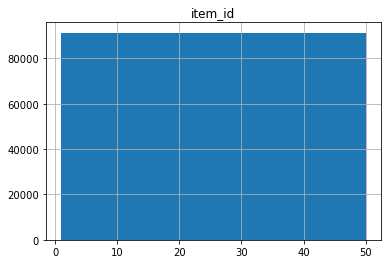

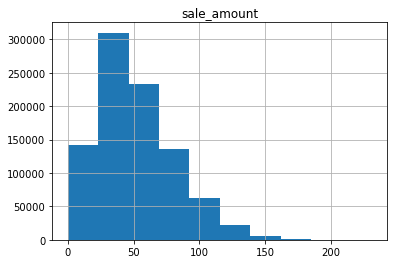

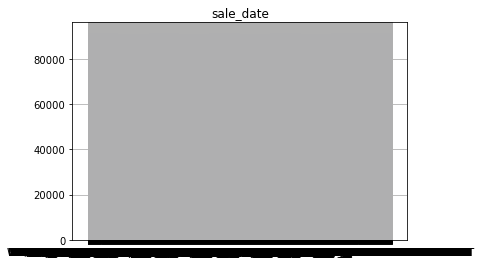

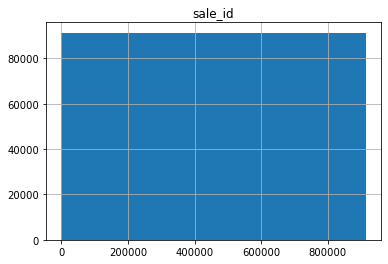

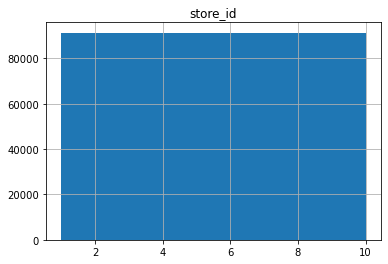

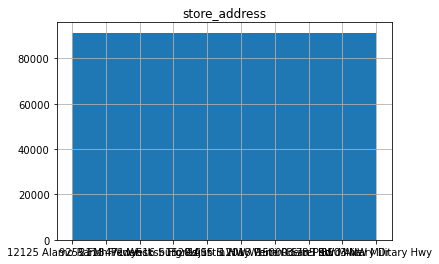

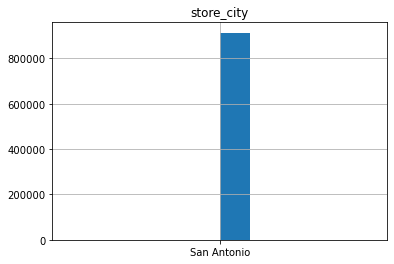

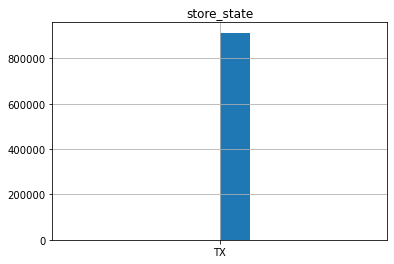

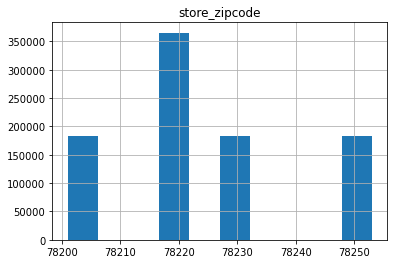

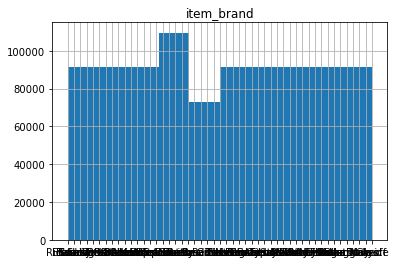

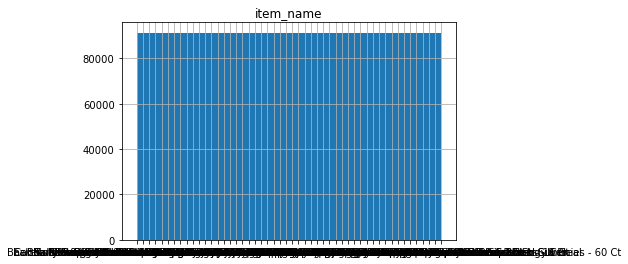

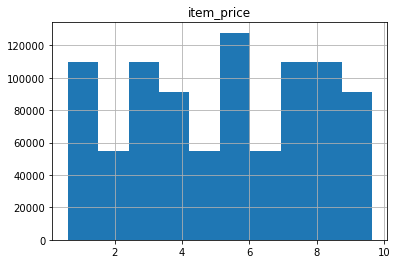

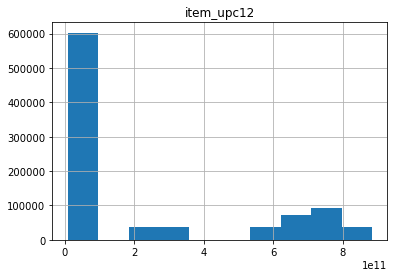

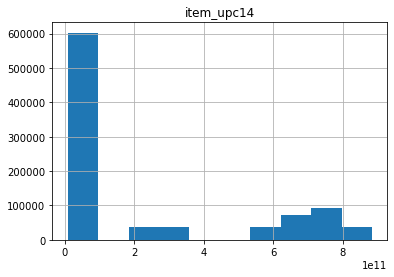

In [49]:
for col in df.columns:
    df[col].hist().plot()
    plt.title(col)
    plt.show()

#### how many distinct stores, items, and sales?

In [50]:
df.store_id.nunique()

10

In [51]:
df.item_id.nunique()

50

In [52]:
df.sale_id.nunique()

913000

#### Takeaways

- 913k rows of data
- have one date that is object type
- no nulls
- all stores in one city
- handful of zip codes
- range of sale_amount and item_price
- im unsure what item_upcs are
- overall, this dataframe is made up of sales dates and their associated item and store
- each observation is a unique sale

## Prepare

for time series data: 
- we generally want to set our dates to datetime types
- look at the frequency of the data 
- look for gaps in time or null values
- as part of this, we'll investigate our data and figure out what each row represents and ask if that is what we want.

In [53]:
df.sale_date

0         Tue, 01 Jan 2013 00:00:00 GMT
1         Wed, 02 Jan 2013 00:00:00 GMT
2         Thu, 03 Jan 2013 00:00:00 GMT
3         Fri, 04 Jan 2013 00:00:00 GMT
4         Sat, 05 Jan 2013 00:00:00 GMT
                      ...              
912995    Wed, 27 Dec 2017 00:00:00 GMT
912996    Thu, 28 Dec 2017 00:00:00 GMT
912997    Fri, 29 Dec 2017 00:00:00 GMT
912998    Sat, 30 Dec 2017 00:00:00 GMT
912999    Sun, 31 Dec 2017 00:00:00 GMT
Name: sale_date, Length: 913000, dtype: object

#### range of dates?

In [54]:
# pulls an alphabetical min and max since they are strings
df.sale_date.min()

'Fri, 01 Apr 2016 00:00:00 GMT'

In [55]:
# all rows have the same time value at the end, can drop this
df.sale_date.str.endswith('00:00:00 GMT').sum()

913000

In [56]:
df.sale_date = df.sale_date.str.replace(' 00:00:00 GMT', '')

In [57]:
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')

In [58]:
df.sale_date.min(), df.sale_date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [59]:
df.sale_date.max() - df.sale_date.min()

Timedelta('1825 days 00:00:00')

#### frequency of dates?

In [60]:
df.sale_date.value_counts()

2013-01-01    500
2016-05-11    500
2016-05-09    500
2016-05-08    500
2016-05-07    500
             ... 
2014-08-29    500
2014-08-28    500
2014-08-27    500
2014-08-26    500
2017-12-31    500
Name: sale_date, Length: 1826, dtype: int64

In [61]:
df.sale_date.value_counts().value_counts()

500    1826
Name: sale_date, dtype: int64

### Process to working with datetimes

1. Convert 'date/time' column to datetime object
2. Set the datetime column as Index
3. Sort the datetime index

#### 1. Convert 'date/time' column to datetime object

formatting info: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [62]:
df.dtypes

item_id                   int64
sale_amount             float64
sale_date        datetime64[ns]
sale_id                   int64
store_id                  int64
store_address            object
store_city               object
store_state              object
store_zipcode             int64
item_brand               object
item_name                object
item_price              float64
item_upc12                int64
item_upc14                int64
dtype: object

#### 2. Set the datetime column as Index

In [63]:
df = df.set_index('sale_date')

#### 3. Sort the datetime index

In [64]:
df = df.sort_index()

In [65]:
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


## Let's get to know our data a litte better

- Currently, the dataframe has one row per sold item, but what if we need more or less granularity?
- Let's consider what it means to define our observation in different ways.
- We'll also look at different time-windows for our data.

### Plot target variable over time

Target variable: sale_amount

In [66]:
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


In [67]:
df.resample('D').sum().sale_amount

sale_date
2013-01-01    13696.0
2013-01-02    13678.0
2013-01-03    14488.0
2013-01-04    15677.0
2013-01-05    16237.0
               ...   
2017-12-27    20378.0
2017-12-28    21885.0
2017-12-29    23535.0
2017-12-30    24988.0
2017-12-31    26420.0
Freq: D, Name: sale_amount, Length: 1826, dtype: float64

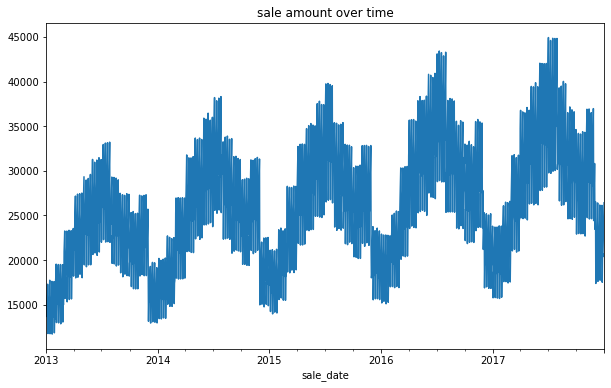

In [68]:
plt.figure(figsize=(10,6))
df.resample('D').sum().sale_amount.plot()
plt.title('sale amount over time')
plt.show()

### Is each store equally represented in this dataset?

In [69]:
df.store_id.value_counts().sort_index()

1     91300
2     91300
3     91300
4     91300
5     91300
6     91300
7     91300
8     91300
9     91300
10    91300
Name: store_id, dtype: int64

### Is each item equally represented in this dataset?

In [70]:
df.item_id.value_counts().sort_index()

1     18260
2     18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
23    18260
24    18260
25    18260
26    18260
27    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
38    18260
39    18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
49    18260
50    18260
Name: item_id, dtype: int64

### Let's look at stores + items

We will explore the data behind the unique combinations of store & item.M

#### what's the first sale date for each store/item combination?

In [71]:
df2 = df.reset_index()

In [73]:
df2.groupby(['store_id', 'item_id']).min().sale_date

store_id  item_id
1         1         2013-01-01
          2         2013-01-01
          3         2013-01-01
          4         2013-01-01
          5         2013-01-01
                       ...    
10        46        2013-01-01
          47        2013-01-01
          48        2013-01-01
          49        2013-01-01
          50        2013-01-01
Name: sale_date, Length: 500, dtype: datetime64[ns]

In [74]:
df2.groupby(['store_id', 'item_id']).min().sale_date.nunique()

1

#### what's the last sale date for each store/item combination?

In [75]:
df2.groupby(['store_id', 'item_id']).max().sale_date

store_id  item_id
1         1         2017-12-31
          2         2017-12-31
          3         2017-12-31
          4         2017-12-31
          5         2017-12-31
                       ...    
10        46        2017-12-31
          47        2017-12-31
          48        2017-12-31
          49        2017-12-31
          50        2017-12-31
Name: sale_date, Length: 500, dtype: datetime64[ns]

In [76]:
df2.groupby(['store_id', 'item_id']).max().sale_date.nunique()

1

#### how many different days were things sold for each store/item combination?

In [77]:
df2.groupby(['store_id', 'item_id']).count().sale_date

store_id  item_id
1         1          1826
          2          1826
          3          1826
          4          1826
          5          1826
                     ... 
10        46         1826
          47         1826
          48         1826
          49         1826
          50         1826
Name: sale_date, Length: 500, dtype: int64

In [78]:
df2.groupby(['store_id', 'item_id']).count().sale_date.nunique()

1

> every store sold one of every item every day in this data's time span

### Check for gaps in time

In [79]:
df.index.nunique()

1826

In [80]:
df.index.max() - df.index.min() + pd.Timedelta('1d')

Timedelta('1826 days 00:00:00')

> there are no gaps in time

## Exploration

How to split our data for time series?

Ideally our split will contain a whole "season" of data. 

To be investigated in the exploration lecture!